In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import matplotlib.dates as mdates
import os
import yaml
import numpy as np
import copy
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

home       = os.path.expanduser("~")
yaml_path  = os.path.join(home, 'dirpaths.yaml')
data_dir   = yaml.safe_load(open(yaml_path))['DATA_PATH']

fname      = 'era5_warm.vars.nc'
fpath      = os.path.join(data_dir, 'jules', 'output', 'era5_larsen_b_grid_point', fname)
output     = nc.Dataset(fpath, 'r')
start_time = pd.Timestamp('2013-01-01 00:00')

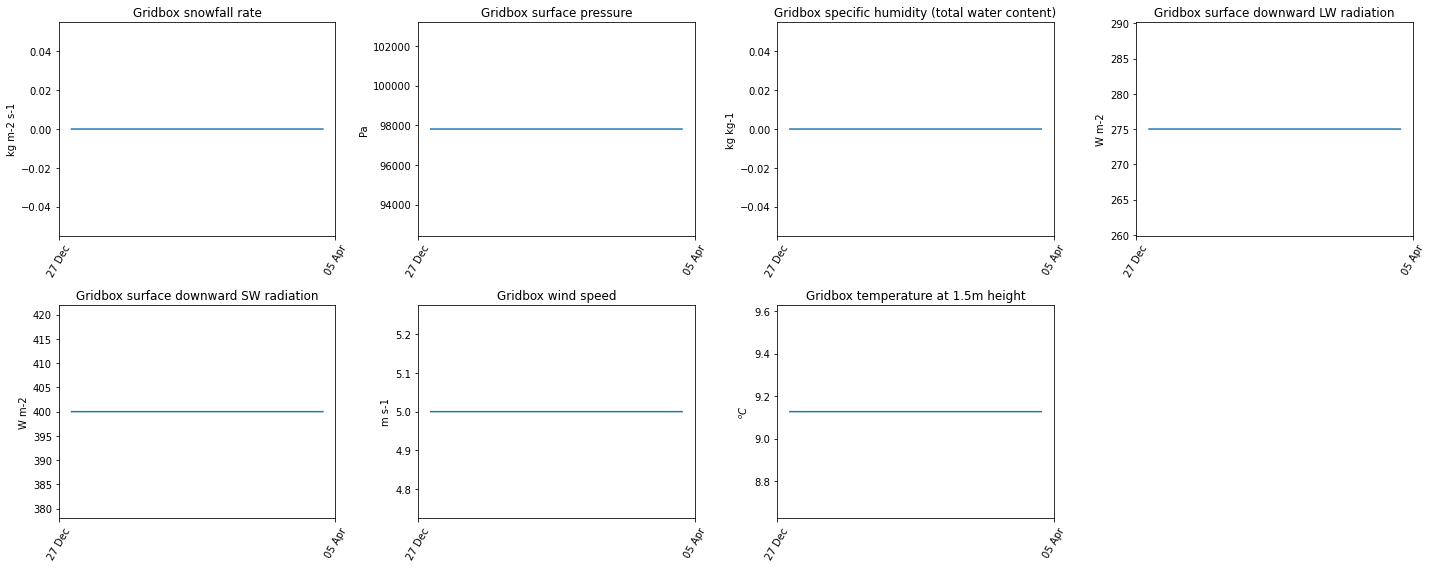

In [2]:
# plot all vars with dimensions (time, y, x)
#gb_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'y', 'x')]
gb_vars = ['snowfall','pstar','qw1','lw_down','sw_down','wind','t1p5m_gb']

fig, axes = plt.subplots(-(-len(gb_vars) // 4), 4, figsize=(20, 4 * ((len(gb_vars) + 3) // 4)))
axes = axes.flat

for ax, v in zip(axes, gb_vars):
    data = output[v][1:-1, 0, 0]
    

    units = getattr(output[v], 'units', '')    
    time = pd.date_range(start=start_time, periods=len(data), freq='H')

    if v == 't1p5m_gb':
        data -= 273.15
        units = '$^oC$'
        
    ax.plot(time, data)
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel(units)
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=360))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

    
    ax.tick_params(axis='x', rotation=60)

for ax in axes[len(gb_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [3]:
nsnow = output['nsnow'][:, 8, 0, 0]
print(nsnow)

[49. 49. 49. ... 47. 47. 47.]


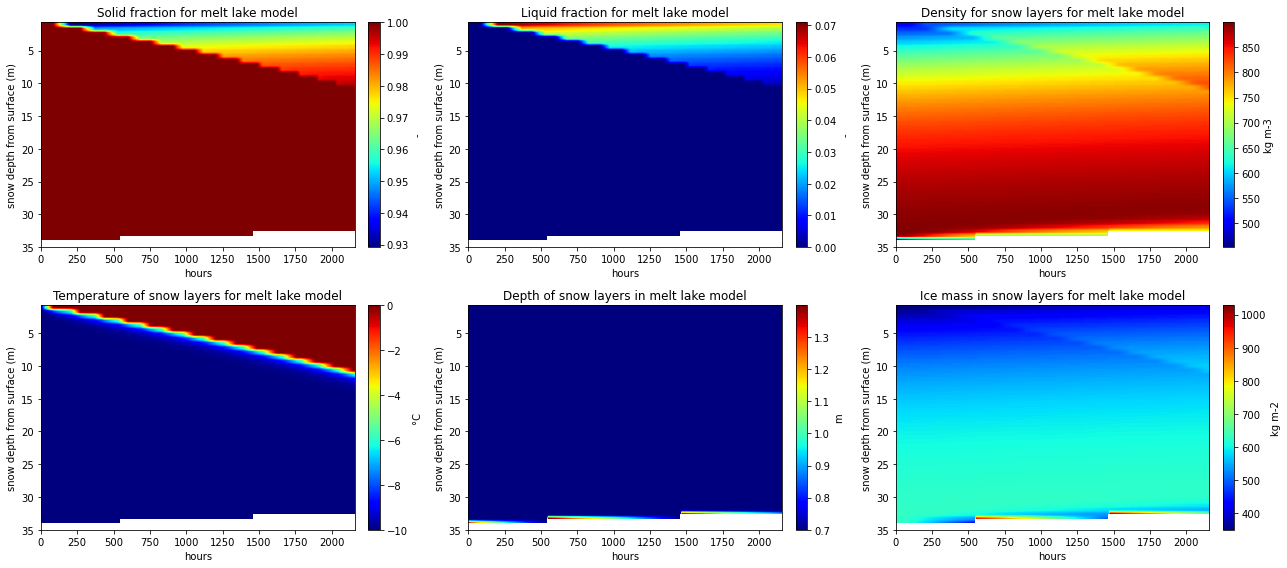

In [4]:
depth = np.arange(35, 0, -0.7)  

snow_vars = [v for v in output.variables
             if output.variables[v].dimensions == ('time', 'snow_ml', 'tile', 'y', 'x')]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flat

nsnow = output['nsnow'][:, 8, 0, 0].astype(int)

# safe colormap copy
cmap = copy.copy(plt.cm.get_cmap('jet'))
cmap.set_bad('white')

for ax, v in zip(axes, snow_vars):

    data = np.array(output[v][:,:, -1, 0, 0])
    units = getattr(output[v], 'units', '')
    if v == 'tsnow_ml':
        data -= 273.15
        units = '°C'
    
    time = pd.date_range(start=start_time, periods=len(data), freq='H')
    
    # mask inactive levels
    for t, n_active in enumerate(nsnow):
        if n_active < data.shape[1]:
            data[t, n_active:] = np.nan
    
    im = ax.imshow(data.T, aspect='auto', origin='lower', cmap=cmap,extent=[0, data.shape[0], depth[-1], depth[0]])
    ax.set(title=getattr(output[v], 'long_name', v), ylabel='snow depth from surface (m)', xlabel='hours')
    plt.colorbar(im, ax=ax, label=units, fraction=0.046, pad=0.04)
    ax.invert_yaxis()  
    #ax.set_ylim(0, 10)

for ax in axes[len(snow_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()


In [5]:
#end of run values 
#nsnow = output.variables['nsnow'][:,8,0,0]
#print('-------------------- nsnow ------------------------')
#print(nsnow) 

sub_surf_roff = output.variables['sub_surf_roff'][3000:3100,0,0]
print('-------------------- sub_surf_roff ------------------------')
print(sub_surf_roff) 

tsnow_ml = output.variables['tsnow_ml'][-1,:,8,0,0]-273.15
print('-------------------- tsnow ------------------------')
print(tsnow_ml) 

snow_ice_ml = output.variables['snow_ice_ml'][-1,:,8,0,0]
print('-------------------- ice mass ------------------------')
print(snow_ice_ml) 

snow_liq_ml = output.variables['snow_liq_ml'][-1,:,8,0,0]
print('-------------------- liquid mass ------------------------')
print(snow_liq_ml) 

rho_snow_ml = output.variables['rho_snow_ml'][-1,:,8,0,0]
print('-------------------- density ------------------------')
print(rho_snow_ml) 

sfrac_ml = output.variables['sfrac_ml'][-1,:,8,0,0]
print('-------------------- solid fraction ------------------------')
print(sfrac_ml) 

lfrac_ml = output.variables['lfrac_ml'][-1,:,8,0,0]
print('-------------------- liquid fraction ------------------------')
print(lfrac_ml) 

snow_ds_ml = output.variables['snow_ds_ml'][-1,:,8,0,0]
print('-------------------- snow layer depths ------------------------')
print(snow_ds_ml) 

-------------------- sub_surf_roff ------------------------
[]
-------------------- tsnow ------------------------
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -5.2490234e-03 -6.1955261e+00
 -8.7529907e+00 -9.6045532e+00 -9.8740540e+00 -9.9592590e+00
 -9.9858704e+00 -9.9951172e+00 -9.9986572e+00 -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01 -1.0000000e+01  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
-------------------- ice mass ------------------------
[410.8357  434.08292 451.02414 466.4358  480.6293  493.79822 506.0

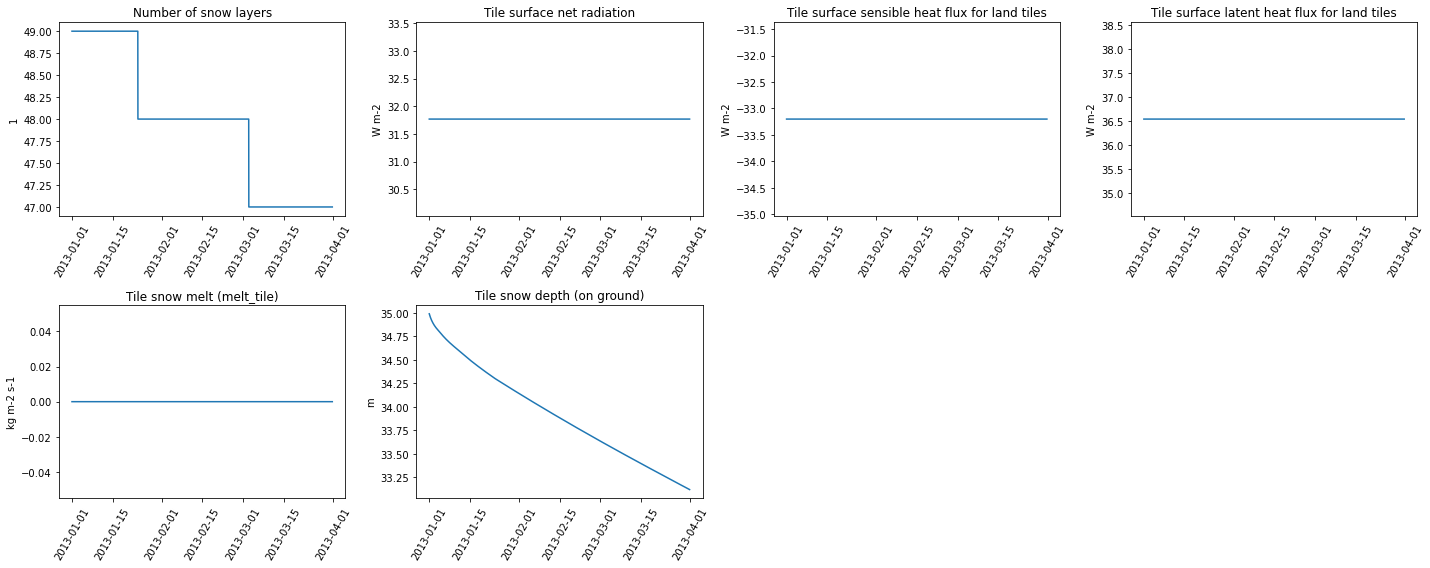

In [7]:
# plot all vars with dimensiosn (time, tile, y, x)

#tile_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'tile', 'y', 'x')]

tile_vars = ['nsnow','rad_net_tile','ftl','le','snow_melt', 'snow_depth']

fig, axes = plt.subplots(-(-len(tile_vars) // 4), 4, figsize=(20, 4 * ((len(tile_vars) + 3) // 4)))
axes = axes.flat

for ax, v in zip(axes, tile_vars):
    data = output[v][1:-1, 8, 0, 0]
    
    units = getattr(output[v], 'units', '')    
    time = pd.date_range(start=start_time, periods=len(data), freq='H')

    if v == 'tstar':
        data -= 273.15
        units = '$^oC$'
        
    ax.plot(time, data)
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel(units)
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    
    ax.tick_params(axis='x', rotation=60)

for ax in axes[len(tile_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()